# Trabajo Semanal 2
### Joaquin Ezequiel Alvarez Olmedo

El trabajo semanal 2 consiste en diseñar un filtro pasabajos butterworth de orden 2 en base al circuito Ackerberg-Mossberg:

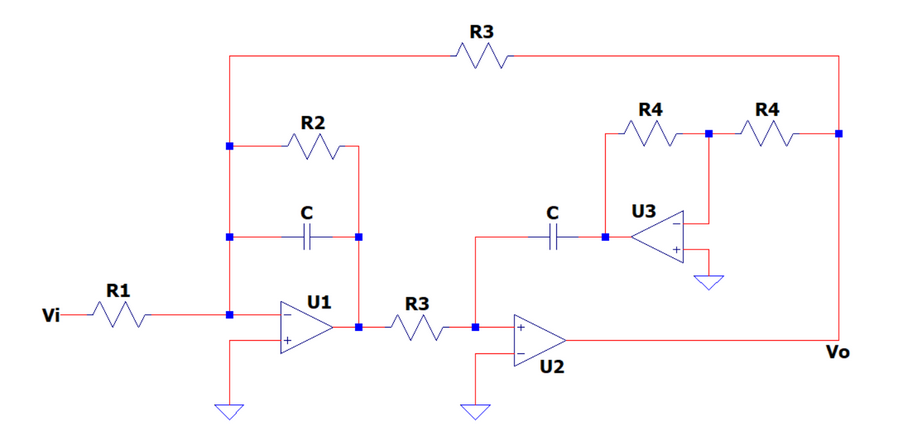

Comenzamos planteando las ecuaciones de nodos:

1) $ V_x(\frac{1}{R_1} + \frac{1}{R_2} + \frac{1}{R_3} + SC_1) - V_i(\frac{1}{R_1}) - V_a(\frac{1}{R_2} + SC_1) - V_o(\frac{1}{R_3}) = 0 $
   
2) $ V_y(\frac{1}{R_3} + SC_2) - V_a(\frac{1}{R_3}) - V_b(SC_2) = 0 $
   
3) $ V_z(2\frac{1}{R_4}) - V_b(\frac{1}{R_4}) - V_o(\frac{1}{R_4}) = 0 $

Podemos considerar Vy = 0 debido a las caracteristicas del OP AMP. A su vez conociendo las caracteristicas de la configuración inversora predecimos que Vb = -Vo. Desarrollamos la ecuación 2:

$ -V_a(\frac{1}{R_3}) - V_b(SC_2) = 0 $

$ V_a = V_o(SC_2R_3) $

Reemplazamos los valores en la ecuación 1. Luego de hacer el álgebra llegamos a la siguiente transferencia:

$ T(S) = \frac{-\frac{R_3}{R_1}\frac{1}{C_1C_2R_3^{2}}}{S^{2} + S\frac{1}{C_1R_2} + \frac{1}{C_1C_2R_3^{2}}} $

Para simplificar el diseño haremos que C1 = C2. Dicho esto obtenemos los parametros w0, Q y K: 

$ w_0 = \sqrt{\frac{1}{C^{2}R_3^{2}}} $

$ Q = \frac{R_2}{R_3} $

$ K = -\frac{R_3}{R_1} $

Ahora, si buscamos diseñar un filtro que cumpla maxima planicidad necesitamos determinar 2 parametros: "n" y "$\xi^{2}$". Buscamos diseñar un filtro Butter de 2do orden, por lo tanto resulta sencillo determinar los parametros: n = 2 y $\xi^{2} = 1 $. 

Desarrollamos el modulo al cuadrado:

$ |T(jw)|^{2} = \frac{1}{1 + \xi^{2}*w^{2n}} = \frac{1}{1 + w^{4}}$

Evaluando en $ w = \frac{S}{j} $:

$ |T(S)|^{2} = \frac{1}{S^{4} + 1}$

Para obtener la transferencia deseada resolvemos mediante partes de función o podemos predecir que los coeficientes resultantes del denominador cumplen cierta simetria cuando aproximamos por Butter. A su vez, para un orden 2, Q siempre es $ \frac{1}{\sqrt{2}} $. La transferencia será:

$ T(S) = \frac{1}{S^{2} + S\sqrt{2} + 1}$

Ahora buscamos las proporciones entre los componentes del circuito bajo la norma de frecuencia:

$ w_0^{2} = 1 = \frac{1}{C^{2}R_3^{2}}$

$ \frac{w_0}{Q} = \sqrt{2} = \frac{1}{C_1R_2} $

De estas ecuaciones obtenemos las proporciones de componentes que buscamos para que nuestro filtro cumpla maxima planicidad mediante aproximación Butter:

$ C = \frac{1}{R_3} $

$ R_2 = \frac{R_3}{\sqrt{2}} $

Si quisiesemos normalizar impedancia, elegimos R3 como norma:

$ \begin{gather*}
R_3 = 1 \\C = 1 \\R_2 = Q  \\R_1 = \frac{1}{K} \\R_4 = 1 
\end{gather*} $

¿Que pasa si buscamos diseñar un butter de orden 4 que cumpla con |T(0)| = 20dB? Tendremos 2 circuitos como el propuesto en cascada, lo que tenemos que hacer es ajustar los K de ambas secciones tal que el producto de ambos K sea 10 (20dB), lo que nos daria que: 

$ K_1 = K_2 = \sqrt{10}$

Otra cosa muy importante a tener en cuenta es el Q que tendrá cada sección. Si desarrollaramos la aproximación por Butter de orden 4 evaluado en $ w = \frac{S}{j} $, veriamos en el diagrama de polos y ceros que los polos pertenecientes a T(S) serian 2 pares de polos complejos conjugados en el lado izquierdo del eje sigma, cada par con un angulo respecto del eje sigma que determina el Q de su seccion respectiva:

$ Q_1 = \frac{1}{2\cos{\frac{\pi}{8}}} $

$ Q_2 = \frac{1}{2\cos{\frac{3\pi}{8}}} $

A continuación no simularemos 2 secciones de orden 2 sino que simulamos una sola seccion normalizada en frecuencia e impedancia y con esta trataremos de cumplir la condicion que buscamos y a su vez comprobar las relaciones entre los componentes que calculamos a lo largo de la tarea. Mediante el mismo análisis de recien deducimos que $ K = 10 $:

<IPython.core.display.Math object>

[[1,
  array([<Axes: title={'center': 'Respuesta de Magnitud'}, ylabel='Magnitud [dB]'>,
         <Axes: title={'center': 'Respuesta de Fase'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Fase [rad]'>],
        dtype=object)],
 [2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>],
 [3, []],
 [4,
  <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>]]

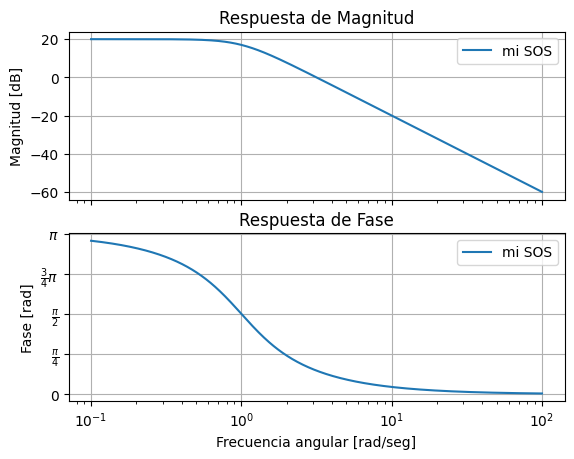

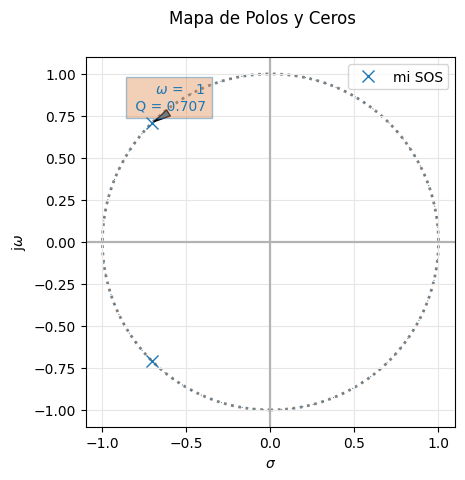

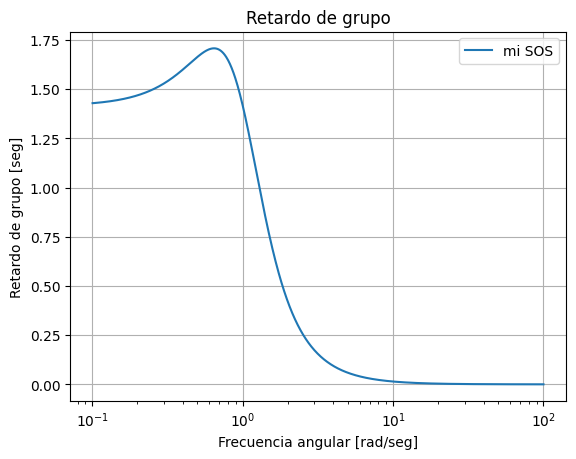

In [2]:
#%% Importamos librerias

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq

#%% Armamos la funcion transferencia basandonos en los componentes del circuito

R3 = 1  # Impedancia normalizada en R3
R2 = R3/(np.sqrt(2))
R1 = R3/10
C = 1/R3

K = -R3/R1  # Podemos manipular |T(0)| variando K. Si buscamos |T(0)| = 20dB = 10, hagamos que R3 = 10*R1
wo = 1/(C*R3)
qq = C*R2

num = np.array([K*(wo**2)]) 
den = np.array([1, wo/qq, wo**2])

pretty_print_bicuad_omegayq(num,den)

mi_sos = sig.TransferFunction(num,den)
    
plt.close('all')
analyze_sys(mi_sos, 'mi SOS')

El programa utilizado para simular el filtro devuelve la transferencia segun sus parametros w0, Q y K, respuesta en frecuencia y lugar geometrico de sus singularidades, todo normalizado en frecuencia e impedancia. Lo importante de todo esto es ver el grafico del módulo para apreciar como afecta el K a la ganancia y comprobar los calculos realizados. Vemos que a frecuencias bajas la ganancia es de 20dB tal como esperabamos.